# Iris Classification Using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Dataset

In [20]:
df = pd.read_csv('Iris.csv',index_col=0)

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# 1. Exploratory Data Analysis (EDA)

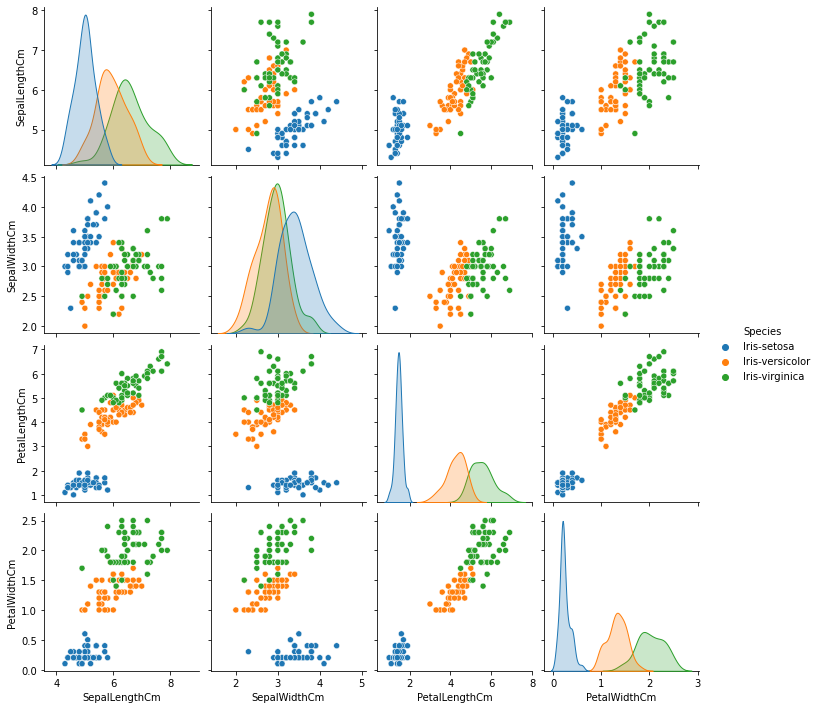

In [31]:
sns.pairplot(df,hue='Species')

## Sepal width vs Sepal length

<Figure size 720x360 with 0 Axes>

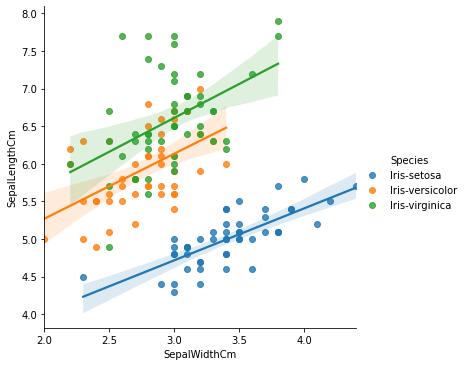

In [78]:
plt.figure(figsize=(10,5))
sns.lmplot(x='SepalWidthCm',y='SepalLengthCm',data=df,hue='Species')

### **And we could see from scatter plot shown that the data on iris-versicolor and iris-virginica is little bit scatter, while iris-stosa is fit on the line

## Petal width vs Petal length

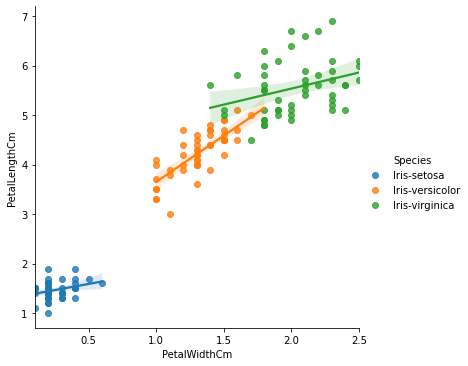

In [80]:
sns.lmplot(x='PetalWidthCm',y='PetalLengthCm',data=df,hue='Species')

### **And we could see from scatter plot shown that the data on iris-setosa and iris-versicolor are fit on the line, while iris-virginica is bit scatter.

## Heatmap Analysis and Correlation for Each Species

<AxesSubplot:>

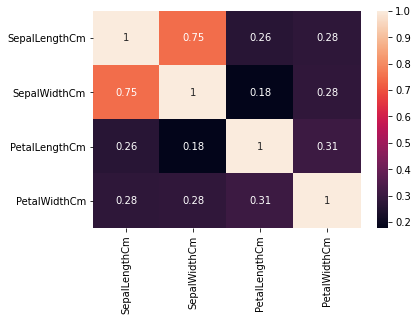

In [81]:
sns.heatmap(df[df['Species'] == 'Iris-setosa'].corr(),annot=True)

### **Analysis from heatmap shown that for 'Iris-setosa' species between Sepal width and length has 0.75 hence this value classified as fairly correlated, while Petal width and Petal length has 0.31 hence it is moderate correlated

<AxesSubplot:>

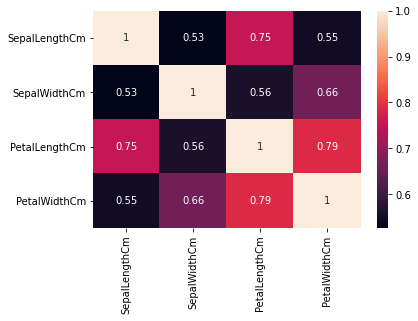

In [75]:
sns.heatmap(df[df['Species'] == 'Iris-versicolor'].corr(),annot=True)

### **Analysis from heatmap shown that for 'Iris-versicolor' species between Sepal width and length has 0.53 hence this value classified as moderate correlated, while Petal width and Petal length has 0.79 hence it is fairly correlated

<AxesSubplot:>

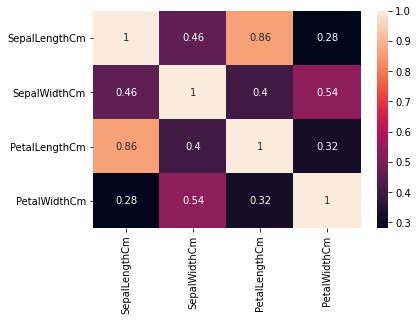

In [76]:
sns.heatmap(df[df['Species'] == 'Iris-virginica'].corr(),annot=True)

### **Analysis from heatmap shown that for 'Iris-virginica' species between Sepal width and length has 0.46 hence this value classified as moderate correlated, while Petal width and Petal length has 0.32 hence it is moderate correlated

# 2. Training using KNN Classifier

### Define Standard Scaler for Dataset

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(df.drop('Species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
scaled_features = scaler.transform(df.drop('Species',axis=1))

### Create new Dataframe contains all scaled of numeric value

In [86]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [88]:
df_feat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Begin initialization model and Training

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df_feat
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [108]:
pred = knn.predict(X_test)

### Evaluate Model

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [110]:
print(classification_report(y_test,pred))
print('\n')
print('Accuracy ', accuracy_score(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



Accuracy  0.9555555555555556


### Find Best K Values

In [103]:
acc_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc_rate.append(accuracy_score(y_test,pred))

Text(0, 0.5, 'Accuracy')

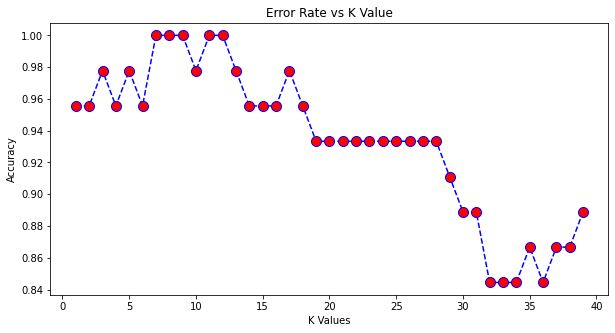

In [105]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),acc_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Values')
plt.ylabel('Accuracy')

## 3. Best K Values (K=7)

In [111]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [112]:
pred = knn.predict(X_test)

In [113]:
print(classification_report(y_test,pred))
print('\n')
print('Accuracy ', accuracy_score(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Accuracy  1.0
